In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

#### population data from: https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=1710007801

In [3]:
mort_file_2015 = os.path.join("..","datas", "mortality", "2015 mortality.csv")

mort_2015 = pd.read_csv(mort_file_2015)
mort_2015 = mort_2015.rename(columns={"2015": "Number of Mortality"})


In [4]:
# population file
pop_file = os.path.join("..","datas", "population", "population.csv")
pop_df = pd.read_csv(pop_file)

# select only 2015, then clean
pop_df = pop_df[["Geography", "Age group", "2015"]]
pop_df = pop_df.rename(columns={"2015":"population"})
pop_df = pop_df.sort_values(by=["Geography"])
pop_df = pop_df.reset_index(drop=True)

# Change string type to int type
pop_df["population"] = pop_df["population"].str.replace(",", "")
pop_df["population"] = pop_df["population"].astype(int)
pop_df.dtypes

Geography     object
Age group     object
population     int32
dtype: object

In [5]:
# Merge dataframe
merged = pd.merge(pop_df,mort_2015)

# Calculate mortality rate
rate = (100*(merged["Number of Mortality"]/merged["population"]))
merged["Mortality Rate"] = rate

merged


,Geography,Age group,population,Number of Mortality,Mortality Rate
0,"Abbotsford-Mission, British Columbia",All ages,184021,1252,0.680357
1,"Barrie, Ontario",All ages,202264,1426,0.705019
2,"Brantford, Ontario",All ages,144109,1339,0.929158
3,"Calgary, Alberta",All ages,1432169,6655,0.464680
4,"Edmonton, Alberta",All ages,1358345,8173,0.601688
5,"Greater Sudbury, Ontario",All ages,165261,1698,1.027466
6,"Guelph, Ontario",All ages,153290,1077,0.702590
7,"Halifax, Nova Scotia",All ages,416824,3136,0.752356
8,"Hamilton, Ontario",All ages,769853,6725,0.873543
9,"Kelowna, British Columbia",All ages,195305,1717,0.879138


In [6]:
rate = (100*(merged["Number of Mortality"]/merged["population"]))
merged["Mortality Rate"] = rate

#### Median income: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1110000801&pickMembers%5B0%5D=1.42

In [7]:
med_inc_file = os.path.join("..","datas", "income", "median_income.csv")
income_df = pd.read_csv(med_inc_file)
income_df = income_df.dropna()

# drop other years except 2015
income_df = income_df.drop(columns=["2013", "2014", "2016"])

# change type to integer
income_df["2015"] = income_df["2015"].str.replace(",","").astype(int)

# calculate mean of ottawa-gatinuea Quebec part and Ont part
# Ottawa-Gatineau, Ontario/Quebec
x = (income_df["2015"][9] + income_df["2015"][10])/2

# append row to df
income_df = income_df.append({"Geography":
                              "Ottawa-Gatineau, Ontario/Quebec","2015":x}, 
                             ignore_index=True)

# now get rid of Quebec part and Ont part.
income_df = income_df.drop(income_df.index[9:11])

# sort it alphabatically
income_df = income_df.sort_values(by=["Geography"]).reset_index(drop=True)

# rename year to median income
income_df = income_df.rename(columns={"2015":"Median Income"})
income_df

,Geography,Median Income
0,"Abbotsford-Mission, British Columbia",30290.0
1,"Barrie, Ontario",35270.0
2,"Brantford, Ontario",33010.0
3,"Calgary, Alberta",43130.0
4,"Edmonton, Alberta",43190.0
5,"Greater Sudbury, Ontario",38560.0
6,"Guelph, Ontario",39260.0
7,"Halifax, Nova Scotia",36390.0
8,"Hamilton, Ontario",35990.0
9,"Kelowna, British Columbia",34610.0


In [8]:
merge = pd.merge(merged,income_df).drop(columns=["Age group"])

### Merge Health indicators

In [9]:
health_file = os.path.join("..","datas", "Health", "Health_Indicators.csv")

health_df = pd.read_csv(health_file)
health_df = health_df.rename(columns={"City": "Geography"})

merged_df = pd.merge(merge, health_df)
merged_df

,Geography,population,Number of Mortality,Mortality Rate,Median Income,obesity rate by bmi,overweight rate by bmi,within 12 months seeing doctor,daily smoker,has regular healthprovider,Heavy drinking,life satisfection,Mood disorder,Poor perceived health,"Perceived life stress, high daily stress",poor perceived mental health,Physical activity 150 minutes per week
0,"Abbotsford-Mission, British Columbia",184021,1252,0.680357,30290.0,23.747290,23.747290,62.547209,12.770282,67.166247,13.422381,75.806566,9.727151,7.933877,18.965227,5.868895,48.744437
1,"Barrie, Ontario",202264,1426,0.705019,35270.0,21.457106,21.704307,56.361982,16.068109,72.479532,16.216430,70.056955,11.124075,11.025195,22.149270,6.625005,43.655816
2,"Brantford, Ontario",144109,1339,0.929158,33010.0,17.972507,24.564739,56.207454,17.625547,70.085838,17.070412,72.028812,9.090341,9.992436,14.086559,5.551353,41.704543
3,"Calgary, Alberta",1432169,6655,0.464680,43130.0,18.314878,28.858326,63.770407,11.709512,70.955313,15.235632,78.314780,6.528559,7.589886,18.517368,5.753511,47.648008
4,"Edmonton, Alberta",1358345,8173,0.601688,43190.0,19.509035,28.998524,62.038731,16.306608,67.192061,15.761828,77.601787,7.869871,8.429375,17.764265,5.447806,44.981209
5,"Greater Sudbury, Ontario",165261,1698,1.027466,38560.0,23.841076,25.353834,55.487986,19.302800,68.860772,17.729531,74.125172,8.955531,13.130745,17.487489,8.350428,41.812648
6,"Guelph, Ontario",153290,1077,0.702590,39260.0,19.570748,26.550982,60.147433,12.590515,77.304456,12.394807,72.477004,11.024855,9.459195,21.527823,6.523583,46.774088
7,"Halifax, Nova Scotia",416824,3136,0.752356,36390.0,22.839376,27.157745,67.318581,14.754429,75.691419,20.560236,78.642305,8.804675,9.164539,17.225496,6.621500,49.493311
8,"Hamilton, Ontario",769853,6725,0.873543,35990.0,19.211460,28.200189,60.868763,15.327602,80.249087,16.821393,76.248323,9.079655,9.066666,18.315185,5.728366,47.944218
9,"Kelowna, British Columbia",195305,1717,0.879138,34610.0,16.179821,27.649062,65.487315,13.210107,67.586595,16.999053,74.857275,9.113950,7.270679,15.206984,4.710581,48.846676


### Graphs

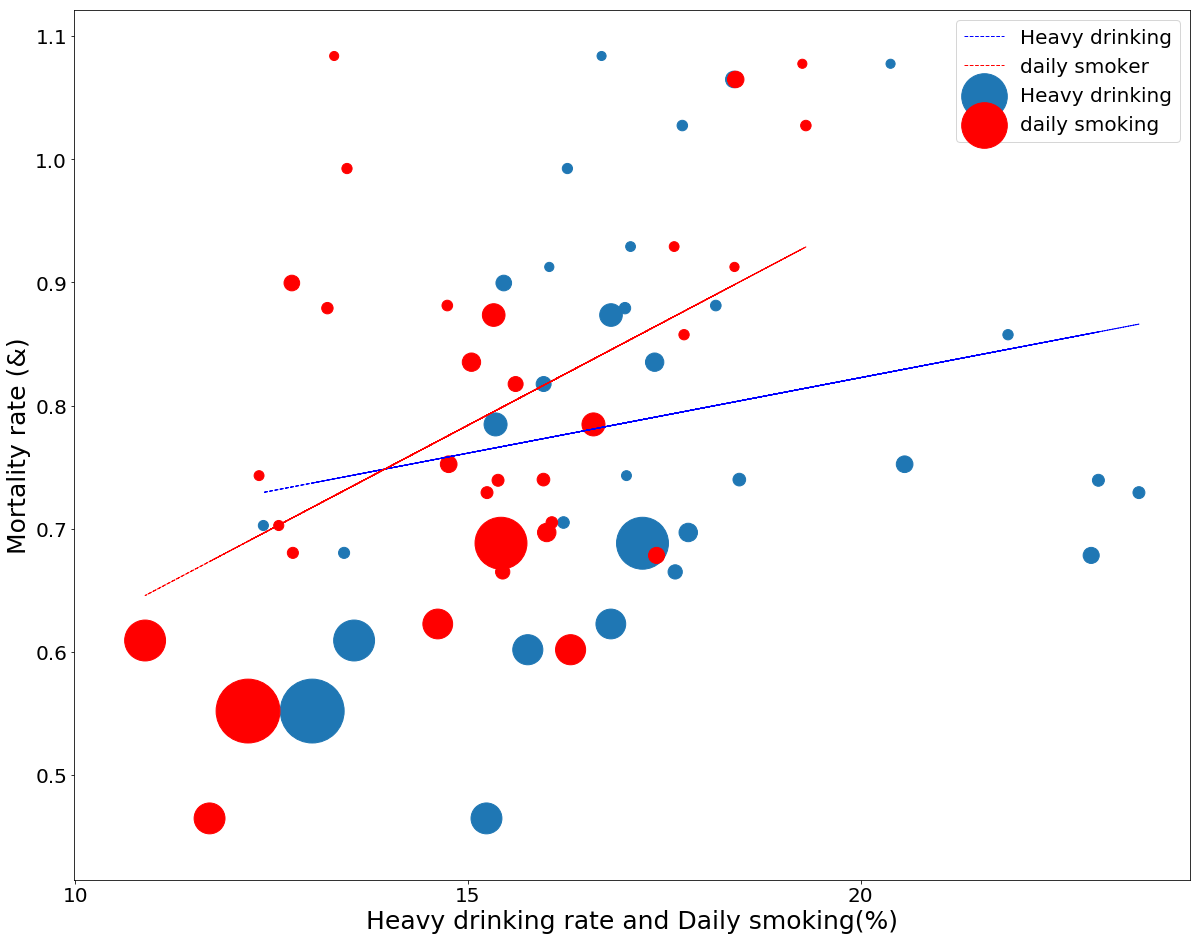

In [10]:
x = merged_df["Heavy drinking"]
y = merged_df["Mortality Rate"]


# linear regression with Mortality Rate Vs. Heavy Drinking
m, _int, r, p_value, std_err = stats.linregress(x, y)
lof = m*x + _int

# set size for points depending on their population
size = merged_df["population"]

fig, ax = plt.subplots(figsize=(20, 16))

ax.scatter(x,y, label="Heavy drinking", s=size/1500)
ax.plot(x,lof, "b--", linewidth=1)
ax.set_xticks(np.arange(10,25,5))
# ax.set_ylabel("Mortality rate (%)", fontsize="medium")
# ax.set_xlabel("Heavy drinking Rate (%)")

plt.xlabel('Heavy drinking rate and Daily smoking(%)', fontsize=25)
plt.ylabel('Mortality rate (&)', fontsize=25)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20);



# For Daily smoking vs. Mortality rate
x = merged_df["daily smoker"]

m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x, y)
lof = m_slope*x + m_int

ax.scatter(x,y, color="red", label="daily smoking", s=size/1500)
ax.plot(x,lof, "r--", linewidth=1)
ax.set_xticks(np.arange(10,25,5))
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
ax.legend(fontsize=20);

In [11]:
print(m)
print(_int)
print(r)
print(p_value)
print(std_err)

print(f"From our data from heavy drinking vs mortality rate we can see slope of {m} positive slope however p-value of {p_value} indicates that the result is not significant")

0.012262063356492518
0.5774740815182056
0.21744576152660539
0.23189588323862834
0.01004925847184695
From our data from heavy drinking vs mortality rate we can see slope of 0.012262063356492518 positive slope however p-value of 0.23189588323862834 indicates that the result is not significant


has a p value of 0.005599388568823237


''

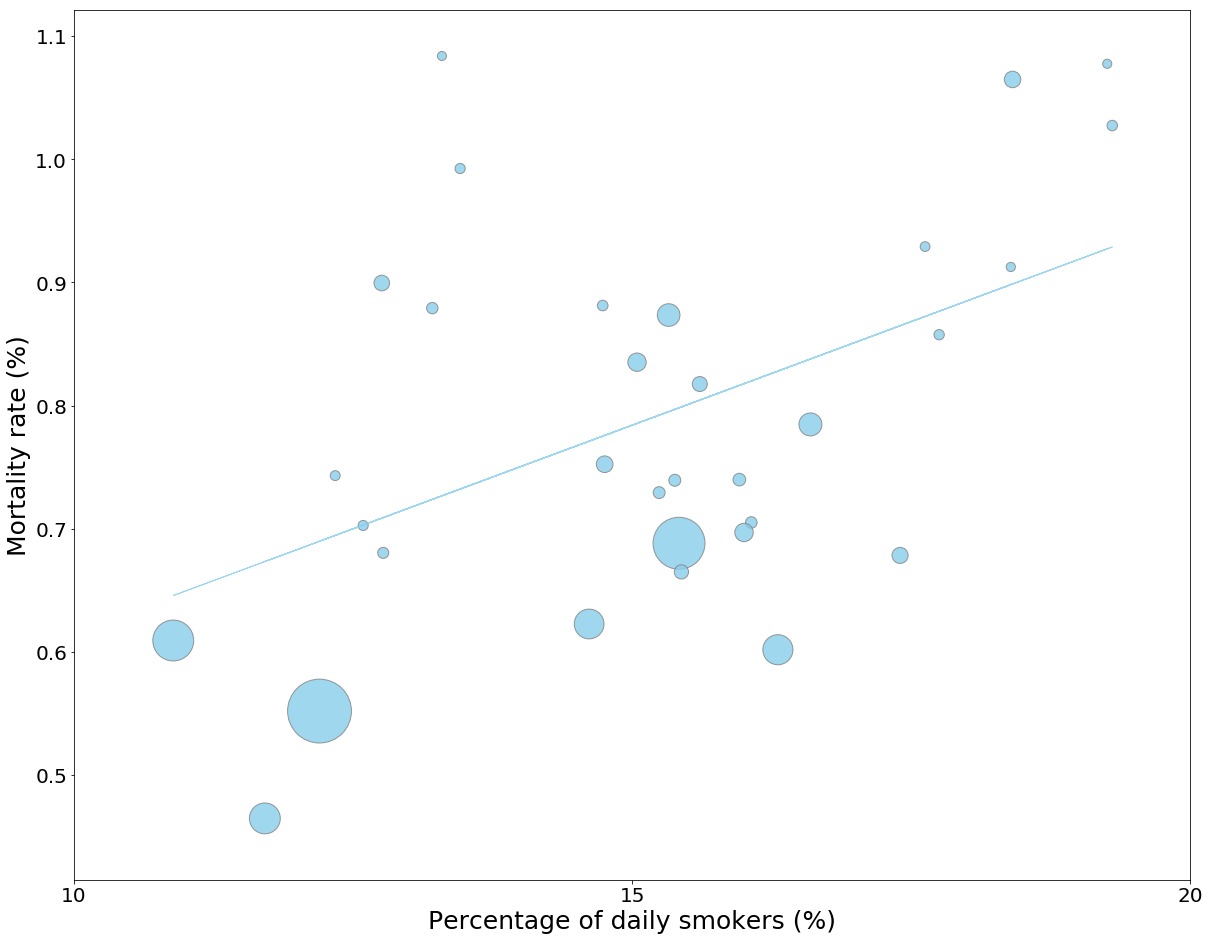

In [12]:
x = merged_df["daily smoker"]

m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x, y)
lof = m_slope*x + m_int

fig, ax = plt.subplots(figsize=(20, 16))

# Scatter
ax.scatter(x,y, c="skyblue", s=size/1500, alpha=0.8, edgecolors="grey")

# line of best fit
ax.plot(x,lof, c="skyblue", linewidth=1, alpha=0.8)

ax.set_xticks(np.arange(10,25,5))
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
ax.set_xlabel("Percentage of daily smokers (%)", fontsize=25)
ax.set_ylabel("Mortality rate (%)", fontsize=25)

print("has a p value of " + str(m_p))
;

In [13]:
print(m_slope)
print(m_int)
print(m_r)
print(m_p)
print(m_std_err)

0.0336524470037775
0.27925493060493034
0.4785127422486793
0.005599388568823237
0.011274489878211079


p_value of 0.12496256817540463 proves that percentage of obesity population significantly affect mortality rate


''

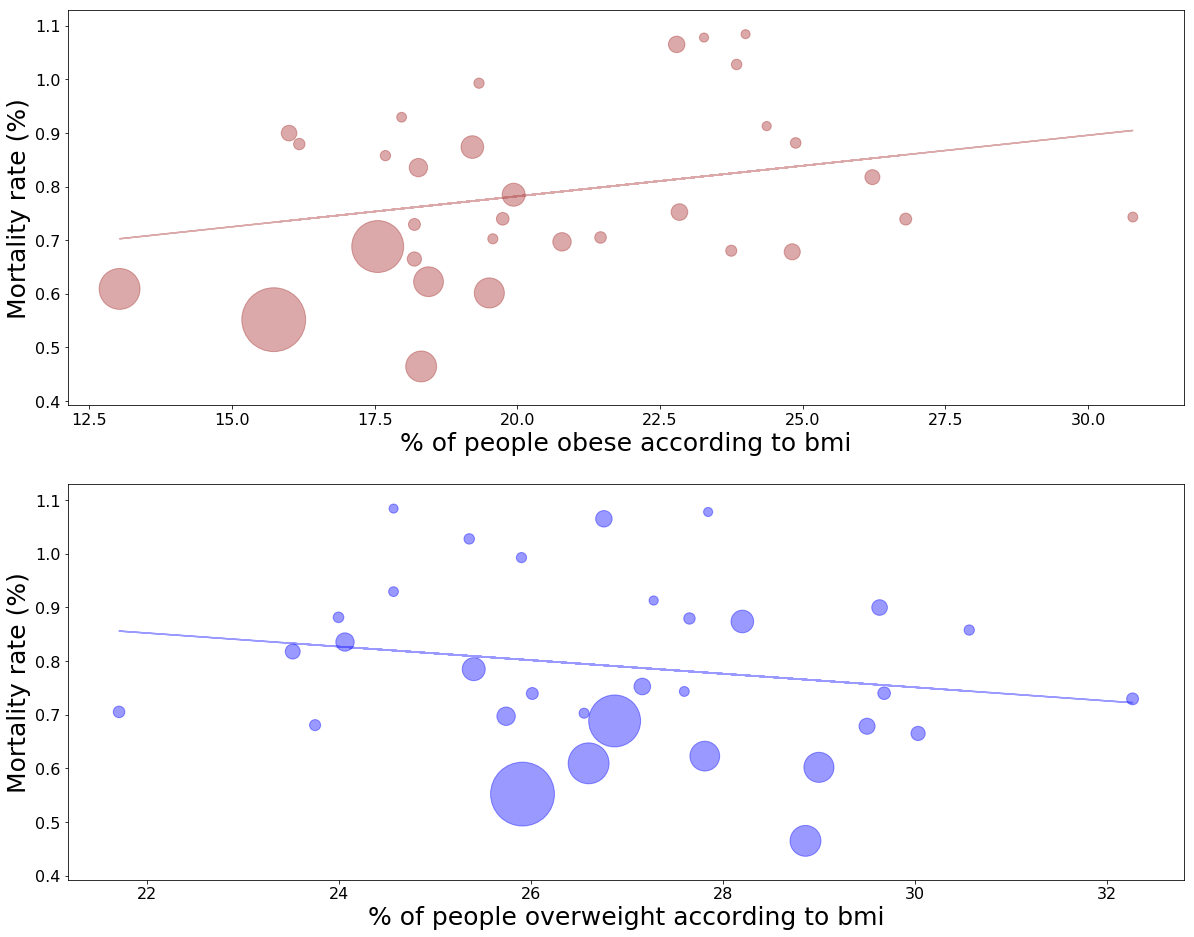

In [14]:
# Obesity and Overweight

x = merged_df["obesity rate by bmi"]
m,b, r, p, std_err = stats.linregress(x,y)
lof = m*x + b

fig, ax = plt.subplots(2,figsize=(20,16))
ax[0].scatter(x,y, color="brown", alpha=0.4, s=size/1500)
ax[0].plot(x,lof, color="brown", alpha=0.4)

# Increasing tick size
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
ax[0].set_xlabel("% of people obese according to bmi", fontsize=25)
ax[0].set_ylabel("Mortality rate (%)", fontsize=25)

print(f'p_value of {p} proves that percentage of obesity population significantly affect mortality rate')


# 2nd axes
x = merged_df["overweight rate by bmi"]
m,b, r, p, std_err = stats.linregress(x,y)
lof = m*x + b

ax[1].scatter(x,y, color="blue", alpha=0.4, s=size/1500)
ax[1].plot(x,lof, color="blue", alpha=0.4)

# Increasing tick size
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    
ax[1].set_xlabel("% of people overweight according to bmi", fontsize=25)
ax[1].set_ylabel("Mortality rate (%)", fontsize=25)

# print(f'{p}')

plt.savefig("Overweight & Obesity Plot.png", bbox_inches='tight')
;




0.04227303389980678 0.392969432633248
0.01781649856388855
-0.019662541352192364 1.144903753019913
0.06657727165582303
0.001728131897883561 0.7804240756524286
0.9423937494704465


''

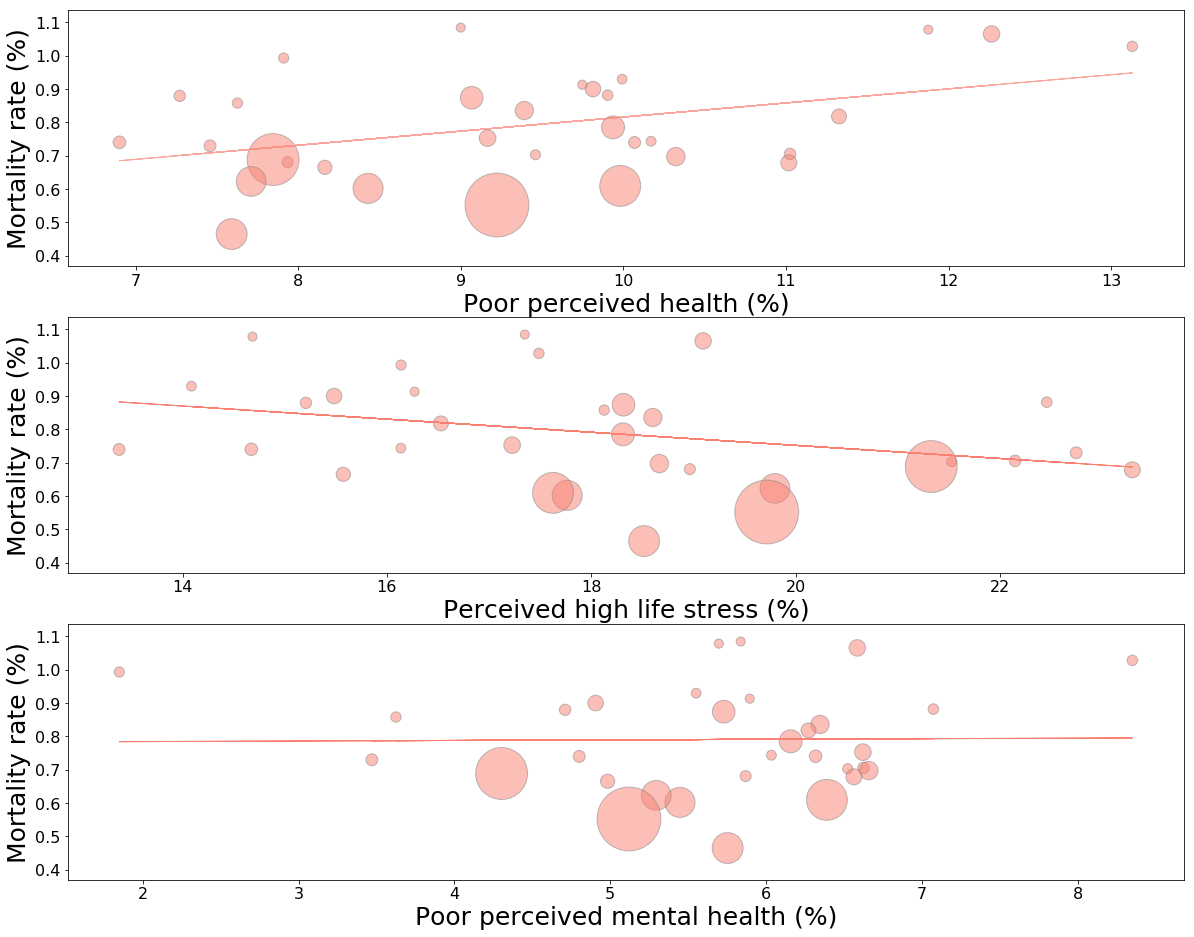

In [18]:
x = merged_df["Poor perceived health"]
y = merged_df["Mortality Rate"]

m, b, r, p, std_err = stats.linregress(x, y)
lof = m*x + b

fig, ax = plt.subplots(3,figsize=(20, 16))
ax[0].scatter(x,y, s=size/1500, c="salmon", alpha=0.5, edgecolors="grey")
ax[0].plot(x,lof, c="salmon", linewidth=1, alpha=0.7)

print(m, b)

for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

ax[0].set_xlabel("Poor perceived health (%)", fontsize=25)
ax[0].set_ylabel("Mortality rate (%)", fontsize=25)

print(p)

# 2nd axes
x = merged_df["Perceived life stress, high daily stress"]

m, b, r, p, std_err = stats.linregress(x, y)
lof = m*x + b

ax[1].scatter(x,y,s=size/1500, c="salmon", alpha=0.5, edgecolors="grey")
ax[1].plot(x,lof,c="salmon", linewidth=1,label='y={:.2f}x+{:.2f}'.format(m,b))

print(m, b)
# ax[1].legend(loc="lower left")

for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

ax[1].set_xlabel("Perceived high life stress (%)", fontsize=25)
ax[1].set_ylabel("Mortality rate (%)", fontsize=25)
print(p)

# 3rd axes

x = merged_df["poor perceived mental health"]

m, b, r, p, std_err = stats.linregress(x, y)
lof = m*x + b

ax[2].scatter(x,y,s=size/1500, c="salmon", alpha=0.5, edgecolors="grey")
ax[2].plot(x,lof, c="salmon", linewidth=1, label='y={:.2f}x+{:.2f}'.format(m,b))
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax[2].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

ax[2].set_xlabel("Poor perceived mental health (%)", fontsize=25)
ax[2].set_ylabel("Mortality rate (%)", fontsize=25)
print(m, b)
# ax[2].legend(loc="upper right")
# plt.plot(x, lof, 'r', label='y={:.2f}x+{:.2f}'.format(m,b))
print(p)

plt.savefig("Perceived health related Plot.png", bbox_inches='tight')
;


In [16]:

print(m)
print(b)

0.001728131897883561
0.7804240756524286
